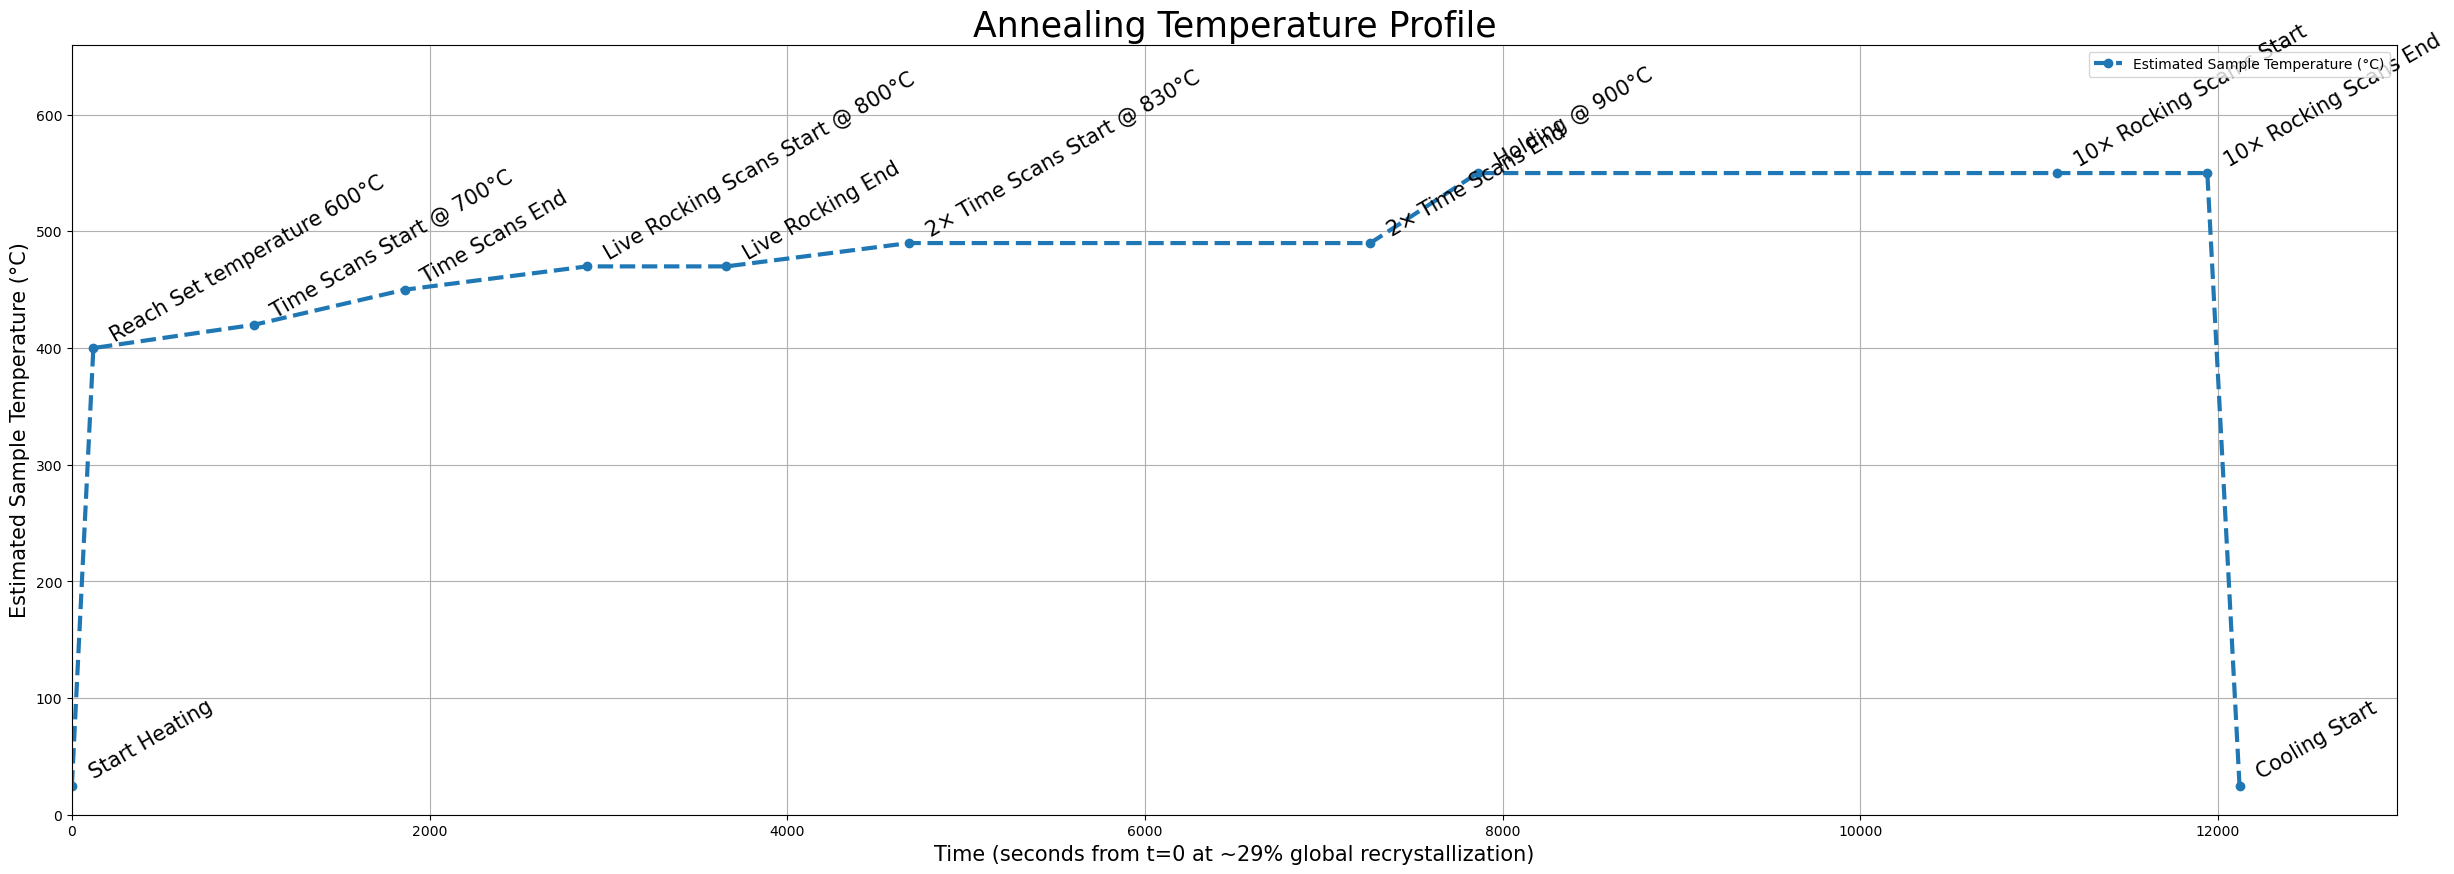

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define absolute timestamps and corresponding time in seconds (t=0 at 29% ReX)
time_labels = [
    ("13:17", 0, "Start Heating"), ("13:19", 120, "Reach Set temperature 600°C"),
    ("13:34", 1020, "Time Scans Start @ 700°C"), ("13:48", 1860, "Time Scans End"),
    ("14:05", 2880, "Live Rocking Scans Start @ 800°C"), ("14:21", 3660, "Live Rocking End"),
    ("14:35", 4680, "2× Time Scans Start @ 830°C"), ("15:36", 7260, "2× Time Scans End"),
    ("15:48", 7860, "Holding @ 900°C"), ("17:07", 11100, "10× Rocking Scams Start"),
    ("17:24", 11940, "10× Rocking Scans End"), ("17:29", 12120, "Cooling Start")
]

# Extract times and normalized temperatures
times = [t[1] for t in time_labels]
temperatures = [25, 400, 420, 450, 470, 470, 490, 490, 550, 550, 550, 25]  # Setpoint - 350°C

# Plot the heating curve
plt.figure(figsize=(30, 10))
plt.plot(times, temperatures, marker='o', linestyle='--',linewidth=3.0, label="Estimated Sample Temperature (°C)")

# Annotate key scan points
for label, t, desc in time_labels:
    plt.annotate(desc, (t, temperatures[times.index(t)]), 
                 textcoords="offset points", xytext=(10, 5), ha='left', fontsize=15, rotation=30)

plt.xlabel("Time (seconds from t=0 at ~29% global recrystallization)",fontsize=15)
plt.ylabel("Estimated Sample Temperature (°C)", fontsize=15)
plt.title("Annealing Temperature Profile", fontsize=25)
plt.grid(True)
plt.xlim(0, 13000)
plt.ylim(0,660)

plt.legend()
plt.savefig("annealing_plot.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


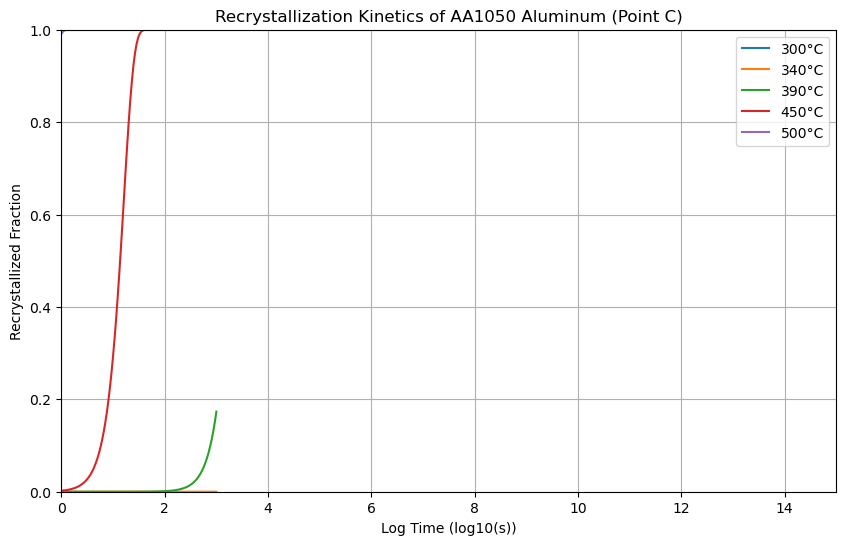

Estimated temperature for 29% recrystallization at 105s: 378.15 K, Fraction: 0.0


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant in J/(mol·K)

# Extracting Avrami parameters from Table IV (Point C)
def avrami_parameters(T, location="C"):
    if location == "C":
        n = 2.2  # Avrami exponent
        ln_b = -59345 / T + 77.3  # From Table IV (Point C)
        ln_k = -85782 / T + 112.5  # Recalculated for Point C
    elif location == "A":
        n = 2.1  # Avrami exponent for Point A
        ln_b = -57871 / T + 74.3  # From Table IV (Point A)
        ln_k = -78408 / T + 101.4  # Recalculated for Point A
    else:
        raise ValueError("Invalid location specified. Choose 'C' or 'A'.")
    
    b = np.exp(ln_b)
    k = np.exp(ln_k)
    return n, k, b

# Function to calculate recrystallized fraction X(t) at time t and temperature T (Kelvin)
def avrami_fraction(t, T, location="C"):
    n, k, b = avrami_parameters(T, location)
    return 1 - np.exp(-k * t**n)

# Time array (logarithmic scale)
time = np.logspace(0, 3, num=100)  # Logarithmic time from 1s to 1000s

# Temperatures in Kelvin from Table II (340°C, 390°C, 450°C)
temperatures_C = [300, 340, 390, 450, 500]  # Extended range of temperatures
temperatures_K = [temp + 273.15 for temp in temperatures_C]  # Convert to Kelvin

# Plotting recrystallization for Point C
plt.figure(figsize=(10, 6))
for T_C, T_K in zip(temperatures_C, temperatures_K):
    X = avrami_fraction(time, T_K, location="C")
    plt.plot(np.log10(time), X, label=f'{T_C}°C')

plt.xlabel('Log Time (log10(s))')
plt.ylabel('Recrystallized Fraction')
plt.title('Recrystallization Kinetics of AA1050 Aluminum (Point C)')
plt.legend()
plt.xlim(0, 15)
plt.ylim(0,1)
plt.grid(True)
plt.show()

# Compute the temperature needed for 29% recrystallization at 105s using the model
T_target = 105 + 273.15  # Temperature in Kelvin
T_rex_29 = avrami_fraction(105, T_target, location="C")

print(f"Estimated temperature for 29% recrystallization at 105s: {T_target} K, Fraction: {T_rex_29}")